# TimML Exercises

## Exercise 6. Interactive plotting

In [3]:
from timml import *
from pylab import *
# interactive plots don't work well with %matplotlib notebook
%matplotlib inline  

Starting solve
Number of elements:  3
Percent progress:  0  
size of matrix (1, 1)
Solution complete
grid of (50, 50). gridding in progress. hit ctrl-c to abort
done with contouring


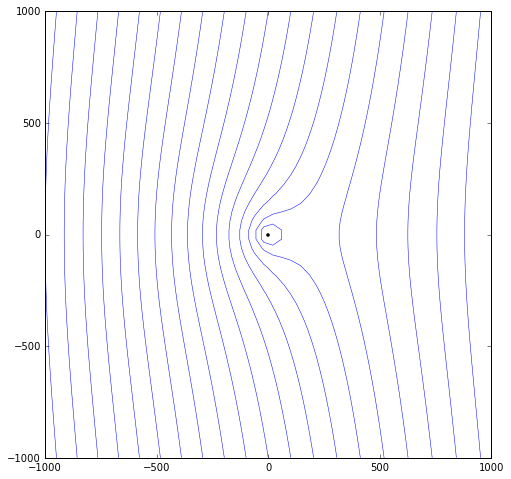

In [22]:
ml = Model(k=10, zb=[0], zt=[10])
uf = Uflow(ml, grad=0.002, angle=0)
rf = Constant(ml, xr=1000, yr=0, head=40, layer=0)
w = Well(ml, xw=0, yw=0, Qw=200, rw=0.1, layers=[0])
ml.solve()
timcontour(ml, -1000, 1000, 50, -1000, 1000, 50, layers=1, levels=20)

In [23]:
xyzlist = []
timelist = []
for ys in linspace(-700, 700, 14):
    xyz, time, mes, lt = traceline(ml, -1000, ys, 0, 50, maxsteps=500, window = [-1000, -1000, 1000, 1000])
    xyzlist.append(xyz)
    timelist.append(time)

reached window boundary
reached window boundary
reached window boundary
reached element of type well
reached element of type well
reached element of type well
reached element of type well
reached element of type well
reached element of type well
reached element of type well
reached element of type well
reached window boundary
reached window boundary
reached window boundary


In [24]:
def welltrace(t):
    figure(figsize=(6,6))
    for xyz, time in zip(xyzlist, timelist):
        x = interp(t, time, xyz[:,0])
        y = interp(t, time, xyz[:,1])
        plot(x, y, 'bo')
    axis('scaled')
    xlim(-1000, 1000)
    ylim(-1000, 1000)
    plot(0, 0, 'ko')

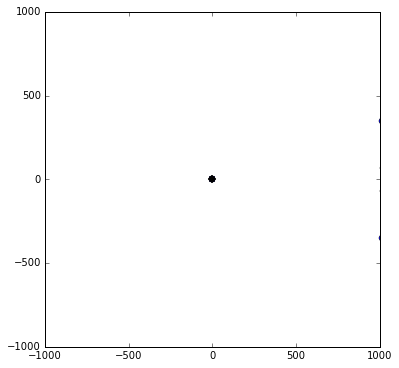

In [25]:
from ipywidgets import interact, FloatSlider
interact(welltrace, t = FloatSlider(min=0, max=40000, step=10, value=0, description='Time')); 

#### Exercise 6a
For the same aquifer, place one well at $(x,y)=(0,-400)$ and one well at $(x,y)=(0,400)$. The wells have the same discharge. Determine the discharge such that no water flows between the two wells.

In [16]:
ml = Model(k=10, zb=[0], zt=[10])
uf = Uflow(ml, grad=0.002, angle=0)
rf = Constant(ml, xr=1000, yr=0, head=40, layer=0)
Q = 400
w1 = Well(ml, xw=0, yw=400, Qw=Q, rw=0.1, layers=[0])
w2 = Well(ml, xw=0, yw=-400, Qw=Q, rw=0.1, layers=[0])
ml.solve()

xyzlist = []
timelist = []
for ys in linspace(-700, 700, 14):
    xyz, time, mes, lt = traceline(ml, -1000, ys, 0, 50, maxsteps=500, window = [-1000, -1000, 1000, 1000])
    xyzlist.append(xyz)
    timelist.append(time)
    
def welltrace(t):
    figure(figsize=(6,6))
    for xyz, time in zip(xyzlist, timelist):
        x = interp(t, time, xyz[:,0])
        y = interp(t, time, xyz[:,1])
        plot(x, y, 'bo')
    axis('scaled')
    xlim(-1000, 1000)
    ylim(-1000, 1000)
    plot(0, -400, 'ko')
    plot(0, 400, 'ko')
    title('time:' + str(t))

Starting solve
Number of elements:  4
Percent progress:  0  
size of matrix (1, 1)
Solution complete
reached element of type well
reached element of type well
reached element of type well
reached element of type well
reached element of type well
reached element of type well
reached element of type well
reached element of type well
reached element of type well
reached element of type well
reached element of type well
reached element of type well
reached element of type well
reached element of type well


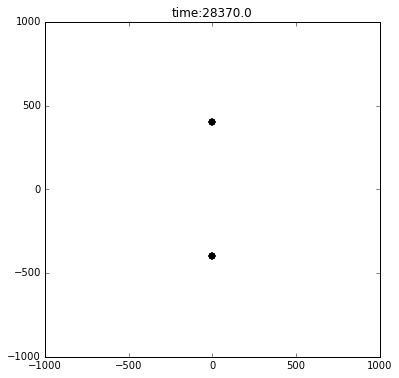

In [17]:
interact(welltrace, t = FloatSlider(min=0, max=40000, step=10, value=0, description='Time')); 